<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 7. Графика для анализа данных в Python.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие 7. Графика для анализа данных в Python.</b>
       * Matplotlib
       * Seaborn
       * Декорирование графиков

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Вопрос до занятий

Нужны ли разделы по
* docker?
* многозадачному программированию в Python?

# Общее

* Мощные средства построения графиков - одна из причин для использования python для анализа данных
* При этом они достаточно просты
* Эти средства отлично интегрированы с numpy и pandas
* Кастомизация графиков не требует значительных усилий, хотя построение красивового сложного графика потребует определенного времени
* Пакеты __matplotlib__ и __seaborn__ хорошо документированы, есть __огромное__ множество примеров
* Графики можно легко сохранять, комбинировать с изображениями и т.д.
 
Импорт __matplotlib__ обычно производится командой:

```python
    import matplotlib.pyplot as plt
```

Для вывода графиков и изображений непосредственно в блокноте jupyter можно использовать команды (на выбор):

```python
%matplotlib inline
%matplotlib notebook
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
%matplotlib inline

In [2]:
import os
import os.path

### Пример - ось x задана неявно (индексом / порядком)

In [3]:
data = np.arange(10) * 2
data

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

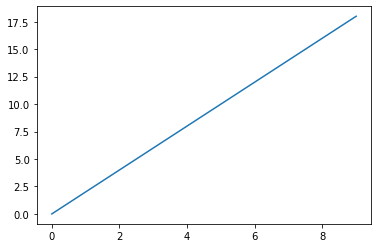

In [4]:
plt.plot(data)

## <font color=red>ЗАДАНИЕ</font>

Выведите график кумулятивной суммы 100 случайных нормально распределенных чисел

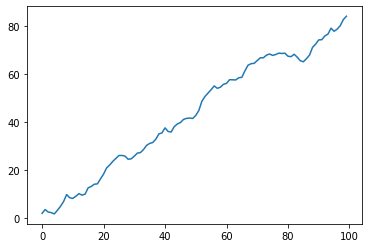

In [11]:
# Ваш код
plt.plot(np.cumsum(np.random.randn(100) + 1))

### Холст и подграфики

* матрица изображений
* $x$ (строки) <br>
* $y$ (столбцы)<br>
* Номер слева-направо сверху-вниз, начинаются с 0<br>

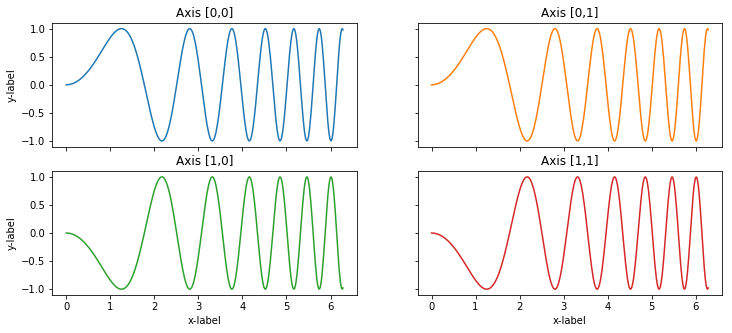

In [9]:
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(2, 2, figsize=(12,5))
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

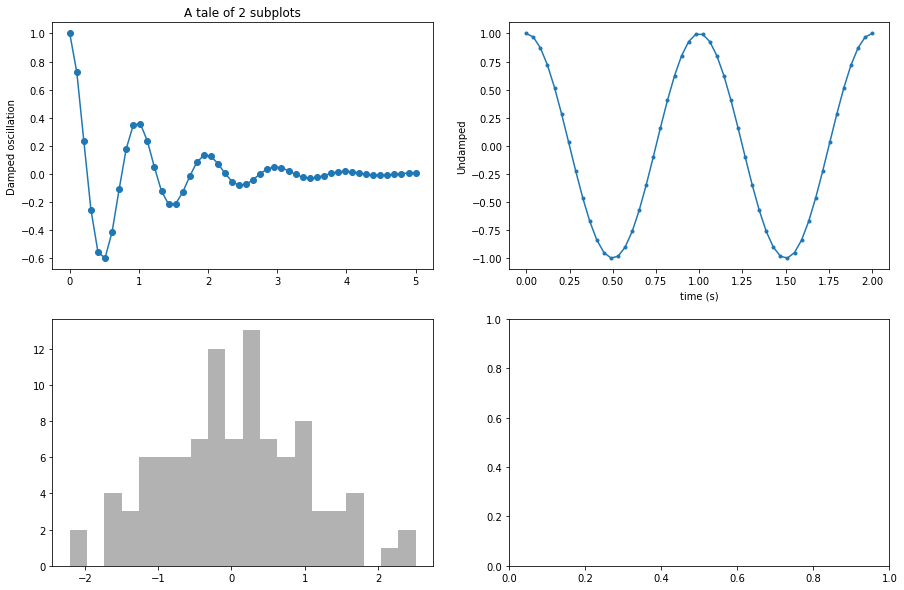

In [10]:
fig = plt.figure(figsize=(15,10))

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 2, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 2, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.subplot(2, 2, 3)
plt.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

plt.subplot(2, 2, 4)


plt.show()

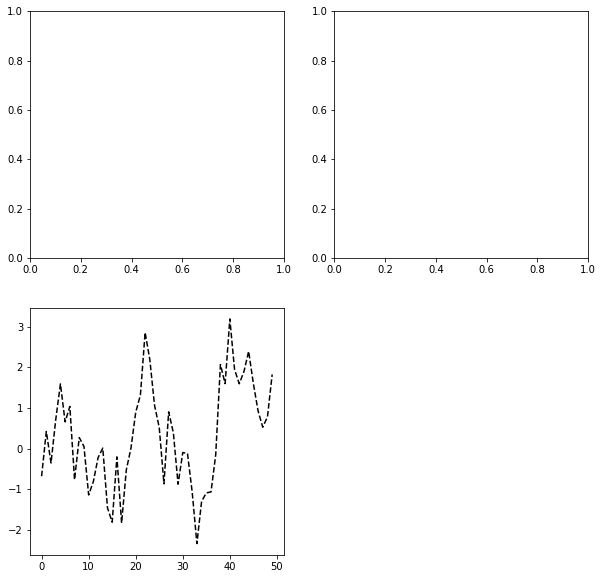

In [15]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# вывод последнего
plt.plot(np.random.randn(50).cumsum(), 'k--');

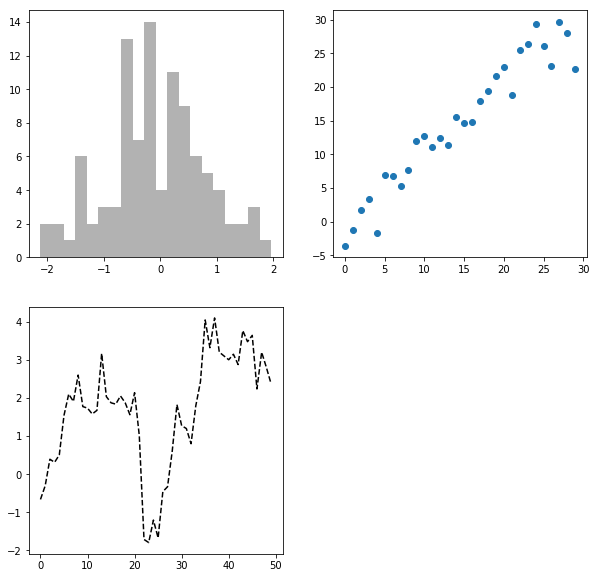

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# вывод последнего
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

#### Двойные оси

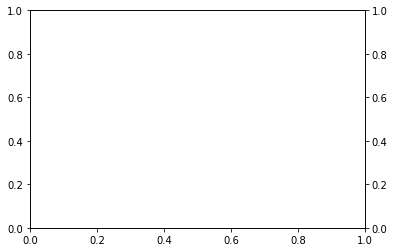

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

Text(0.5, 0, 'Time (s)')

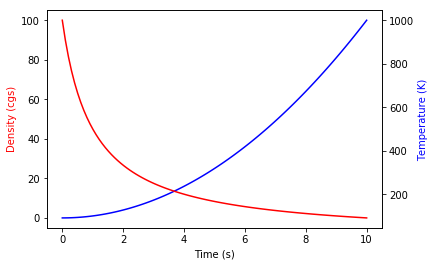

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(t, t ** 2, 'b-')
ax2.plot(t, 1000 / (t + 1), 'r-')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')

## <font color=red>ЗАДАНИЕ</font>

Постройте графики $$f_1(x) = (x-2)^2 - 20 $$ и $$f_2(x) = (x-1)^3$$ <br>$x \in [-6,6]$ с двумя осями так, чтобы оба графика выглядели, как имеющие одинаковый масштаб

Text(0.5, 0, 'Time (s)')

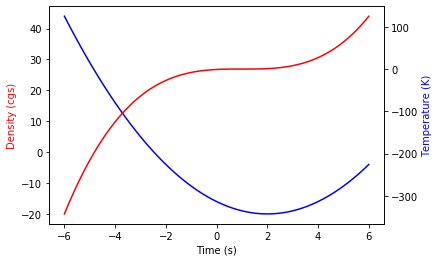

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(-6, 6, 100)
ax1.plot(t, (t - 2) ** 2 - 20, 'b-')
ax2.plot(t, (t - 1) ** 3, 'r-')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')

### Изменение расстояния между подграфиками

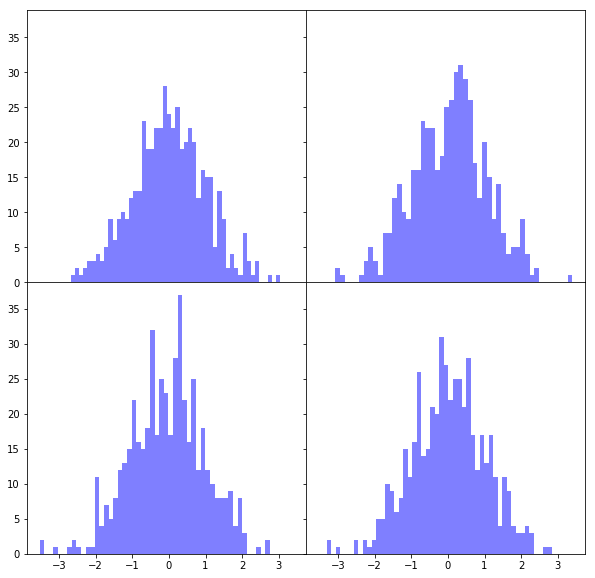

In [21]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

### Цвет, маркеры и стили линий

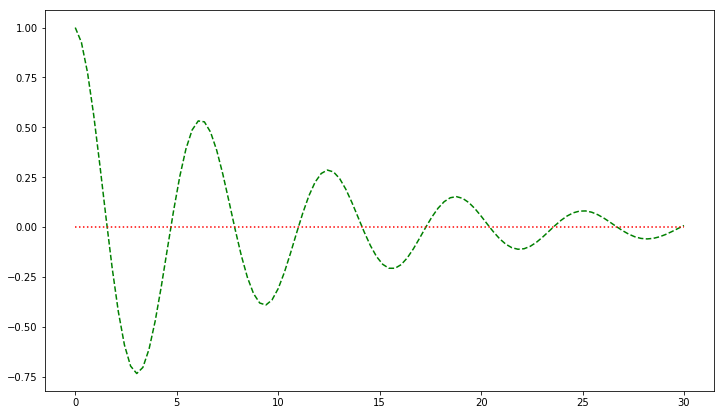

In [22]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1, 1, 1)
x = np.linspace(0., 30, 100)
y = np.exp(-0.1*x) * np.cos(x)
y_0 = np.zeros(100)
ax1.plot(x, y, linestyle='--', color='g')
ax1.plot(x, y_0, linestyle='dotted', color='r')
plt.show()

Linestyle 	            Description
'-' or 'solid' 	        solid line
'--' or 'dashed' 	    dashed line
'-.' or 'dashdot' 	    dash-dotted line
':' or 'dotted' 	    dotted line
'None' or ' ' or '' 	draw nothing

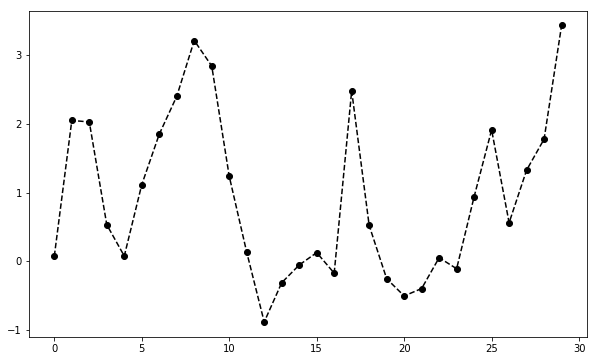

In [23]:
fig = plt.figure(figsize=(10,6))
plt.plot(np.random.randn(30).cumsum(), 'ko--');

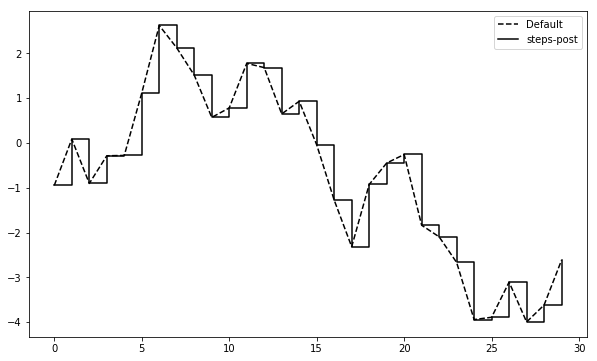

In [25]:
fig = plt.figure(figsize=(10,6))
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best');

### Отметки на осях, метки и легенда

Text(0.5, 0, 'Stages')

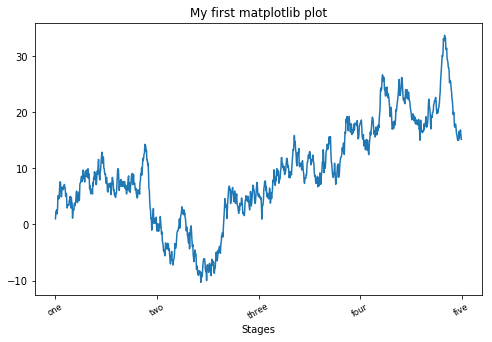

In [26]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

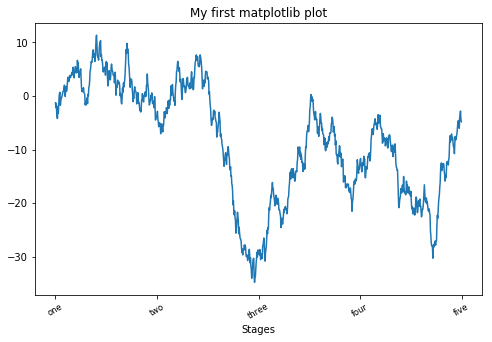

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

props = { 'title': 'My first matplotlib plot', 'xlabel': 'Stages' }
ax.set(**props)

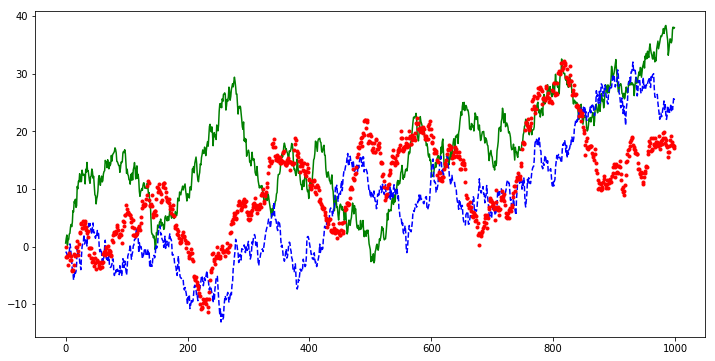

In [28]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one', color='green')
ax.plot(randn(1000).cumsum(), 'k--', label='two', color='blue')
ax.plot(randn(1000).cumsum(), 'k.', label='three', color='red')

### Пример вывода интеграла

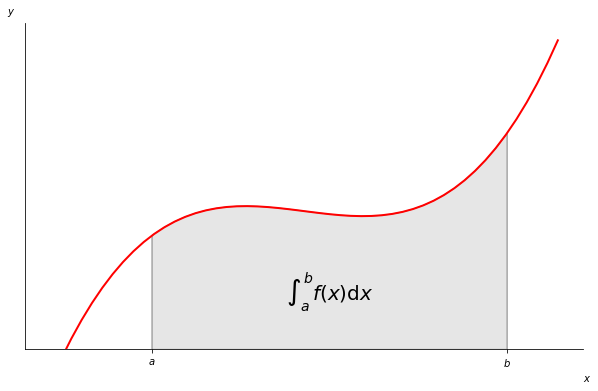

In [29]:

"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
from matplotlib.patches import Polygon

def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

## <font color=red>ЗАДАНИЕ</font>

Выведите аналогичный график для функции $$f(x) = sin(x^2) * x + x $$ в диапазоне $[0,11]$ с пределами интегрирования $[2,8]$. Разместите формулу подинтегральнай функции над графиком слева сверху.

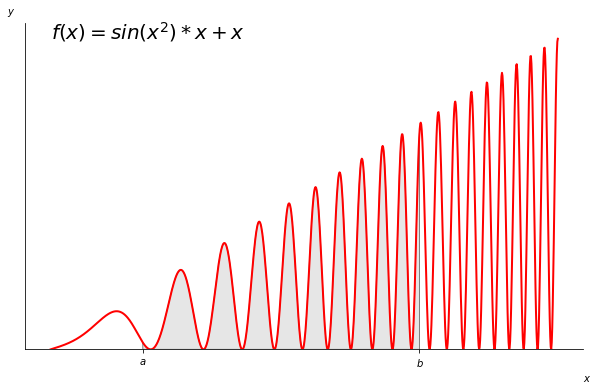

In [28]:
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
from matplotlib.patches import Polygon

def func(x):
    return np.sin(x ** 2) * x + x


a, b = 2, 8  # integral limits
x = np.linspace(0, 11, 1000)
y = func(x)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b, 1000)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0, np.max(y), r"$f(x) = sin(x^2) * x + x$",
         horizontalalignment='left', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

### Декорирование графиков

#### Изображения поверх графика

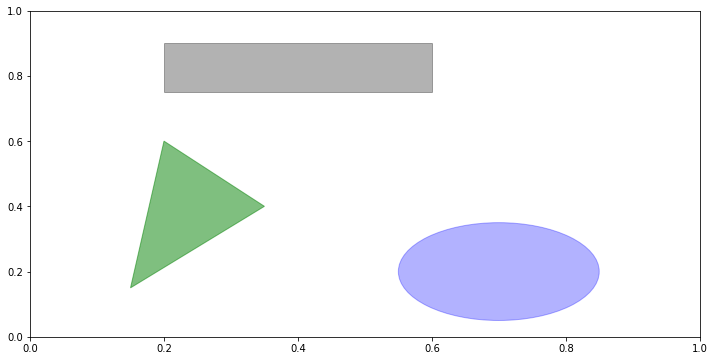

In [31]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Цветовая палитра (colorbar)

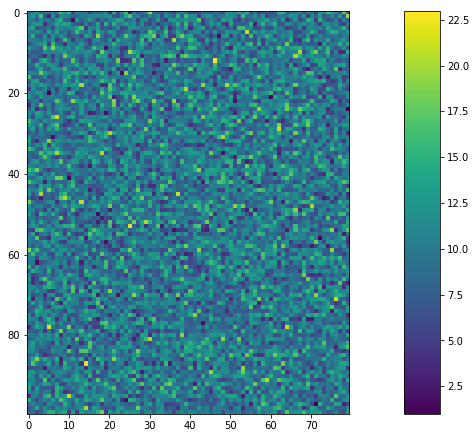

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0.1,0.1,0.6,0.8])
image = np.random.poisson(10., (100, 80))
i = ax.imshow(image, interpolation='nearest')
colorbar_ax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
fig.colorbar(i, cax=colorbar_ax)

### Полный пример

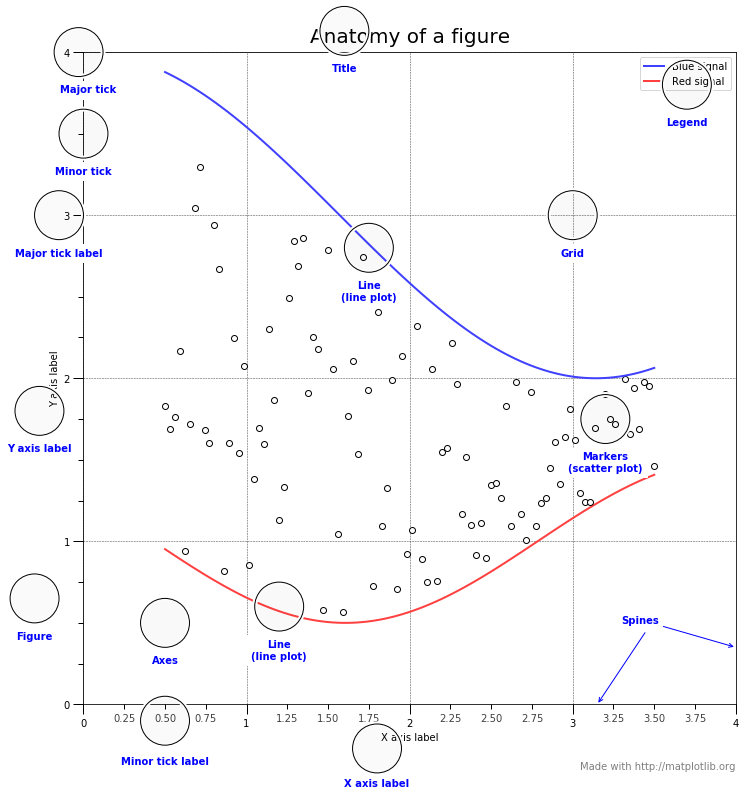

In [24]:
# This figure shows the name of several matplotlib elements composing a figure

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

## <font color=red>ЗАДАНИЕ</font>

Повторите предыдущий пример с интегралом, но максимально декорировав его (использовав все "украшательства" из примера)

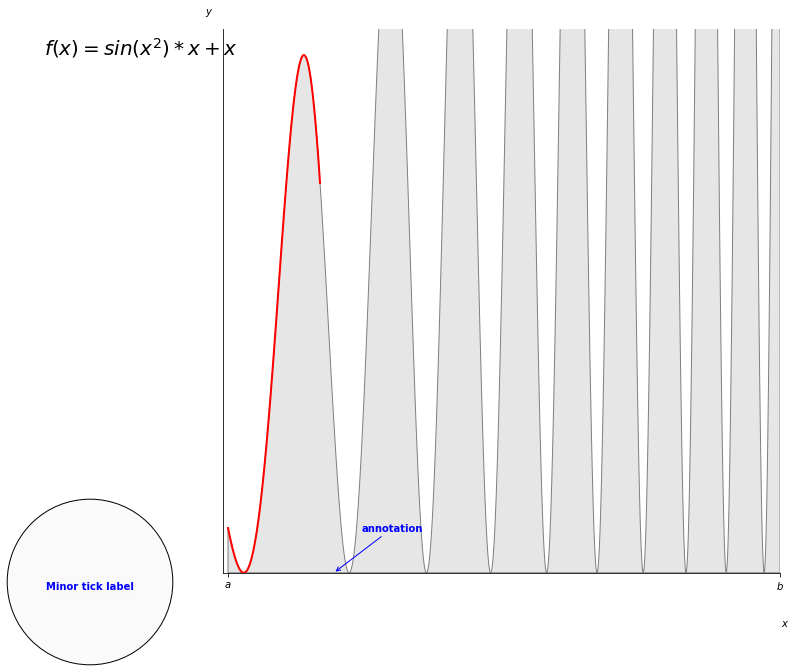

In [51]:
from matplotlib.patches import Polygon

def func(x):
    return np.sin(x ** 2) * x + x


a, b = 2, 8  # integral limits
x = np.linspace(0, 1, 100) + a
y = func(x)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b, 1000)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0, np.max(y), r"$f(x) = sin(x^2) * x + x$",
         horizontalalignment='left', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

circle(0.50, -0.10, 0.9)
text(0.50, -0.10, "Minor tick label")

ax.annotate('annotation', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

plt.show()

### Сохранение изображений в файл

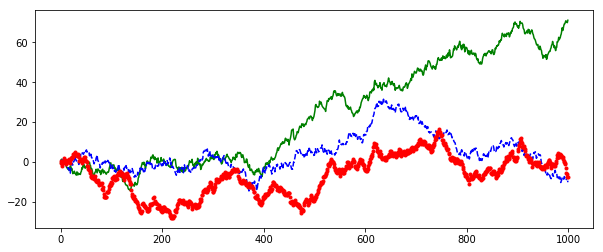

In [35]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one', color='green')
ax.plot(randn(1000).cumsum(), 'k--', label='two', color='blue')
ax.plot(randn(1000).cumsum(), 'k.', label='three', color='red')
plt.savefig('myfigure.svg')

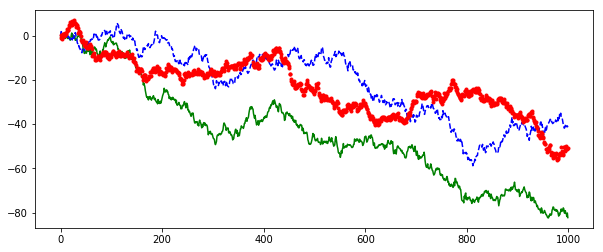

In [36]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one', color='green')
ax.plot(randn(1000).cumsum(), 'k--', label='two', color='blue')
ax.plot(randn(1000).cumsum(), 'k.', label='three', color='red')
plt.savefig('myfigure1.png', dpi=400, bbox_inches='tight')

## Использование pandas и seaborn

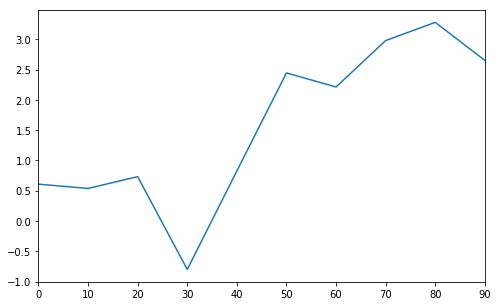

In [37]:
fig = plt.figure(figsize=(8,5))
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [38]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.head()

,A,B,C,D
0,-1.134552,-1.530312,1.842768,0.825890
10,-0.464615,-3.931418,1.674808,0.738241
20,0.480748,-4.267869,3.056361,-0.811447
30,0.372440,-4.061041,4.614253,-0.624163
40,0.791409,-4.263458,5.182846,0.104349


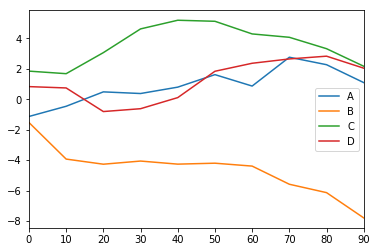

In [39]:
df.plot()

### Столбиковые диаграммы

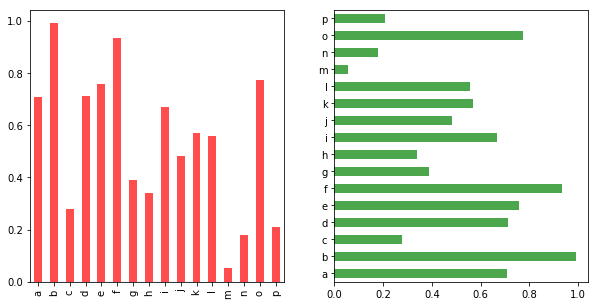

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10,5) )
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='r', alpha=0.7)
data.plot.barh(ax=axes[1], color='g', alpha=0.7)

In [41]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.381151,0.990212,0.151384,0.500921
two,0.846118,0.221556,0.848298,0.669938
three,0.662585,0.701332,0.590650,0.156002
four,0.383734,0.181794,0.366562,0.238835
five,0.418011,0.826457,0.695553,0.254441
six,0.855957,0.072911,0.139685,0.002305


Обратите внимание на __автоматически__ сформированную легенду

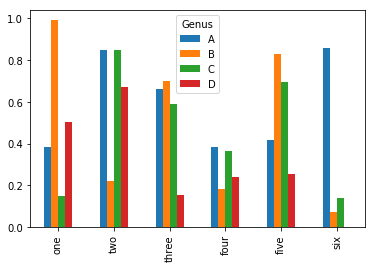

In [42]:
df.plot.bar()

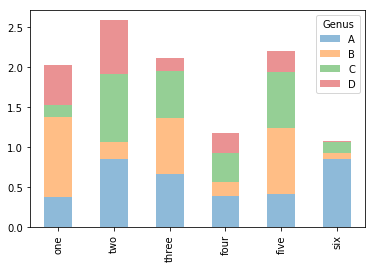

In [43]:
df.plot.bar(stacked=True, alpha=0.5)

In [44]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

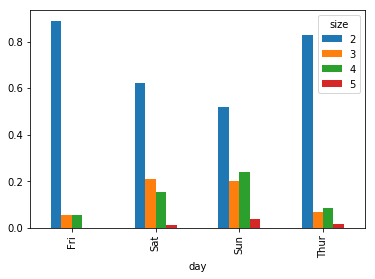

In [45]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

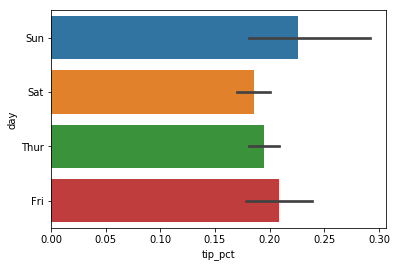

In [46]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

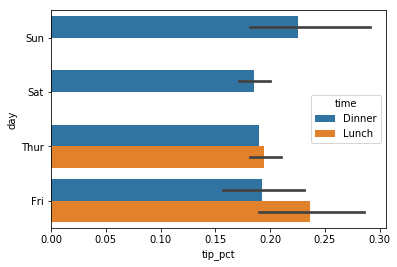

In [47]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

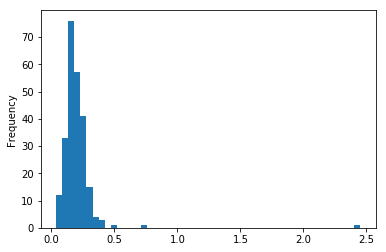

In [48]:
tips['tip_pct'].plot.hist(bins=50)

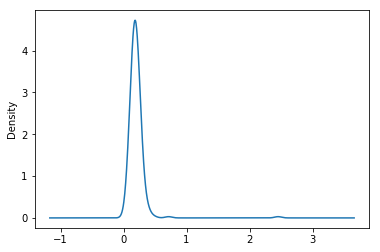

In [49]:
tips['tip_pct'].plot.density()

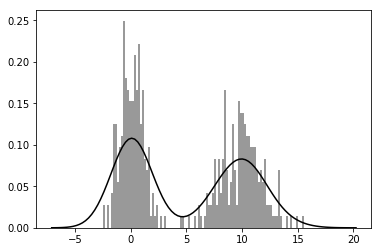

In [50]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Диаграмма разброса (scatter plot) 

In [51]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

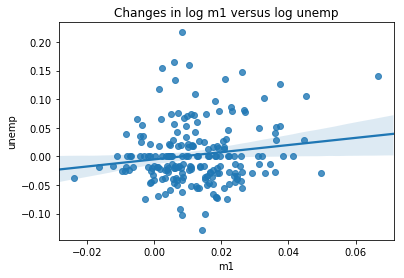

In [52]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

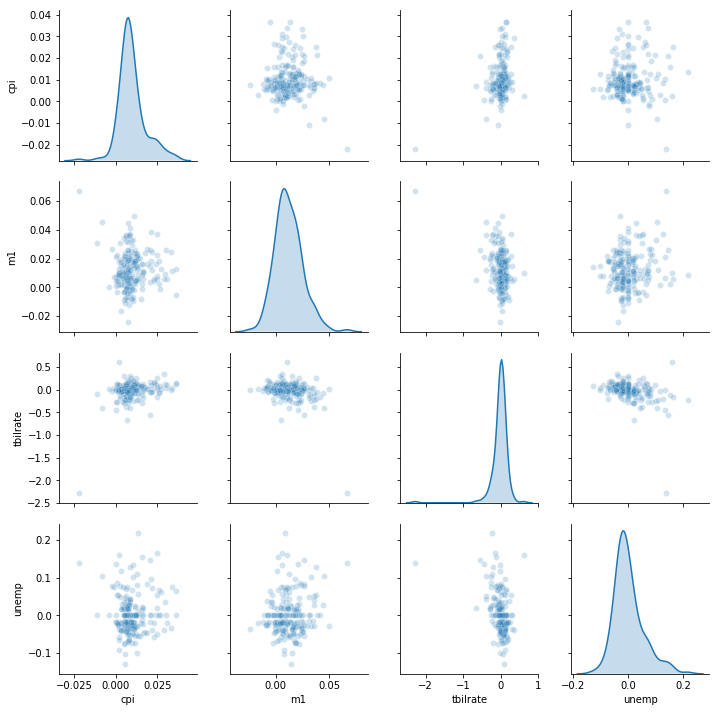

In [53]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Работа с категорийными данными

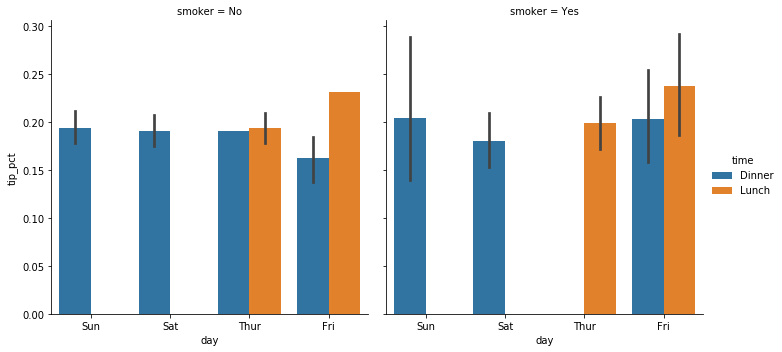

In [54]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

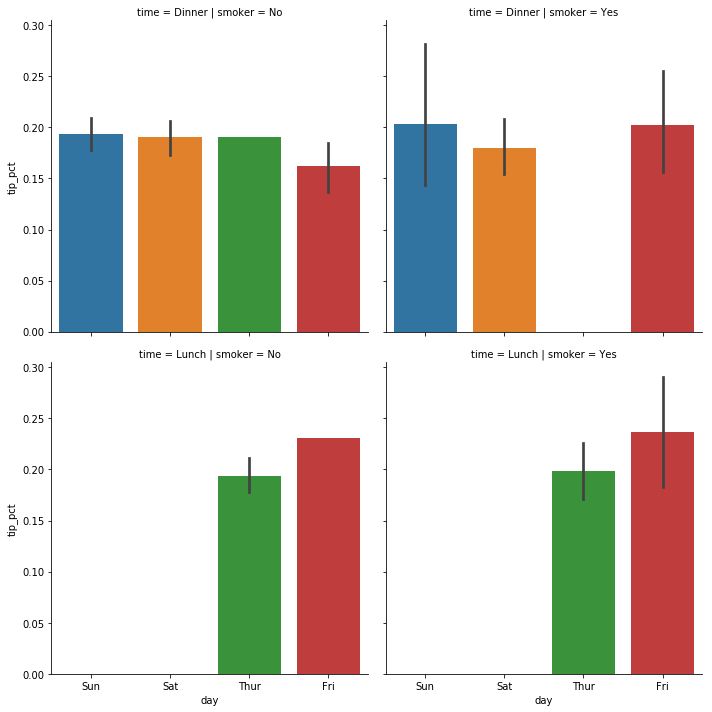

In [55]:
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

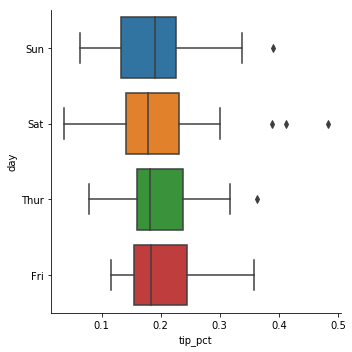

In [56]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Псевдо-3D избражения

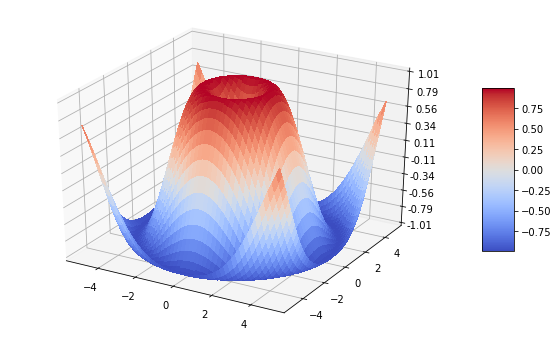

In [56]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## <font color=red>ЗАДАНИЕ</font>

* Загрузите в датафрейм данные по продажам авокадо
* Цифровые поля относятся к кодам видов авокадо

In [57]:
%ls ../datasets/

Avocado Prices/


In [58]:
df = pd.read_csv( os.path.join('..', 'datasets', 'Avocado Prices', 'avocado.csv'))
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделайте по нему, как минимум, следюущие графики:
- цена за всё время с усреднением
- гистограммы распределений 
- попарные гистограммы распределений
- категориальные графики
- графики рассеяния с трендом

In [ ]:
# Ваш код

## Экзаменационные вопросы:

* matplotlib
* seaborn
* Декорирование графиков в matplotlib